In [15]:
from __future__ import division

## Finding organelle contigs from the genome assembly. 

So . . . . in the blobplot there is this mysterious line of contigs around 51-53% GC content. Its mysterious because the rest of the genome should be around 35% 

At first I thought it might be the chloroplast genome. However, in the closest species for which there are chloroplast genomes (both Euphorbiaceace), the GC contents are around 35% as well. 

So here I blasted the genome assembly against one of these chloroplast genomes. here I want to just quickly look at the GC contents of those scaffolds relative to the rest of the genome.


Columns in blast file (customised)

1 qseqid  
2 sseqid  
3 pident  
4 qlen  
5 length  
6 pident   
7 covs  
8 qstart  
9 qend  
10 sstart  
11 send  
12 mismatch  
13 evalue  
14 bitscore  

### I will first find alignments that make up a significant part of the query length.

In [109]:
Cp_contigs = []

blast_outs_tab = open("/home/djeffrie/Data/M_huetii_genome/Organelles/J_curcas_to_polished.out", 'r').readlines()


for line in blast_outs_tab[1:]:
    
    ctg_id = line.split()[1]
    ctg_len = int(line.split()[5])
    aln_len = int(line.split()[4])
    
    scaffold_coverage = aln_len/ctg_len
    
    if scaffold_coverage > 0.7 or aln_len > 5000:
         
        Cp_contigs.append(ctg_id.split("|")[0])
        
Cp_contigs = set(Cp_contigs)

In [110]:
## So I took contigs that had alignments of > 3kb or more than 30% of their length

In [188]:
Cp_GCs = []
Cp_covs = []
Non_Cp_GCs = []
Non_Cp_covs = []

blobs = open("/home/djeffrie/Data/M_huetii_genome/Organelles/blobtools.out.blobDB.table.txt", 'r').readlines()

for line in blobs:
    if "#" not in line:
        ctg_id = line.split()[0]
        GC = line.split()[2]
        cov = line.split()[4]
        
        if ctg_id in Cp_contigs:
            Cp_GCs.append(float(GC))
            Cp_covs.append(float(cov))
        else:
            Non_Cp_GCs.append(float(GC))
            Non_Cp_covs.append(float(cov))

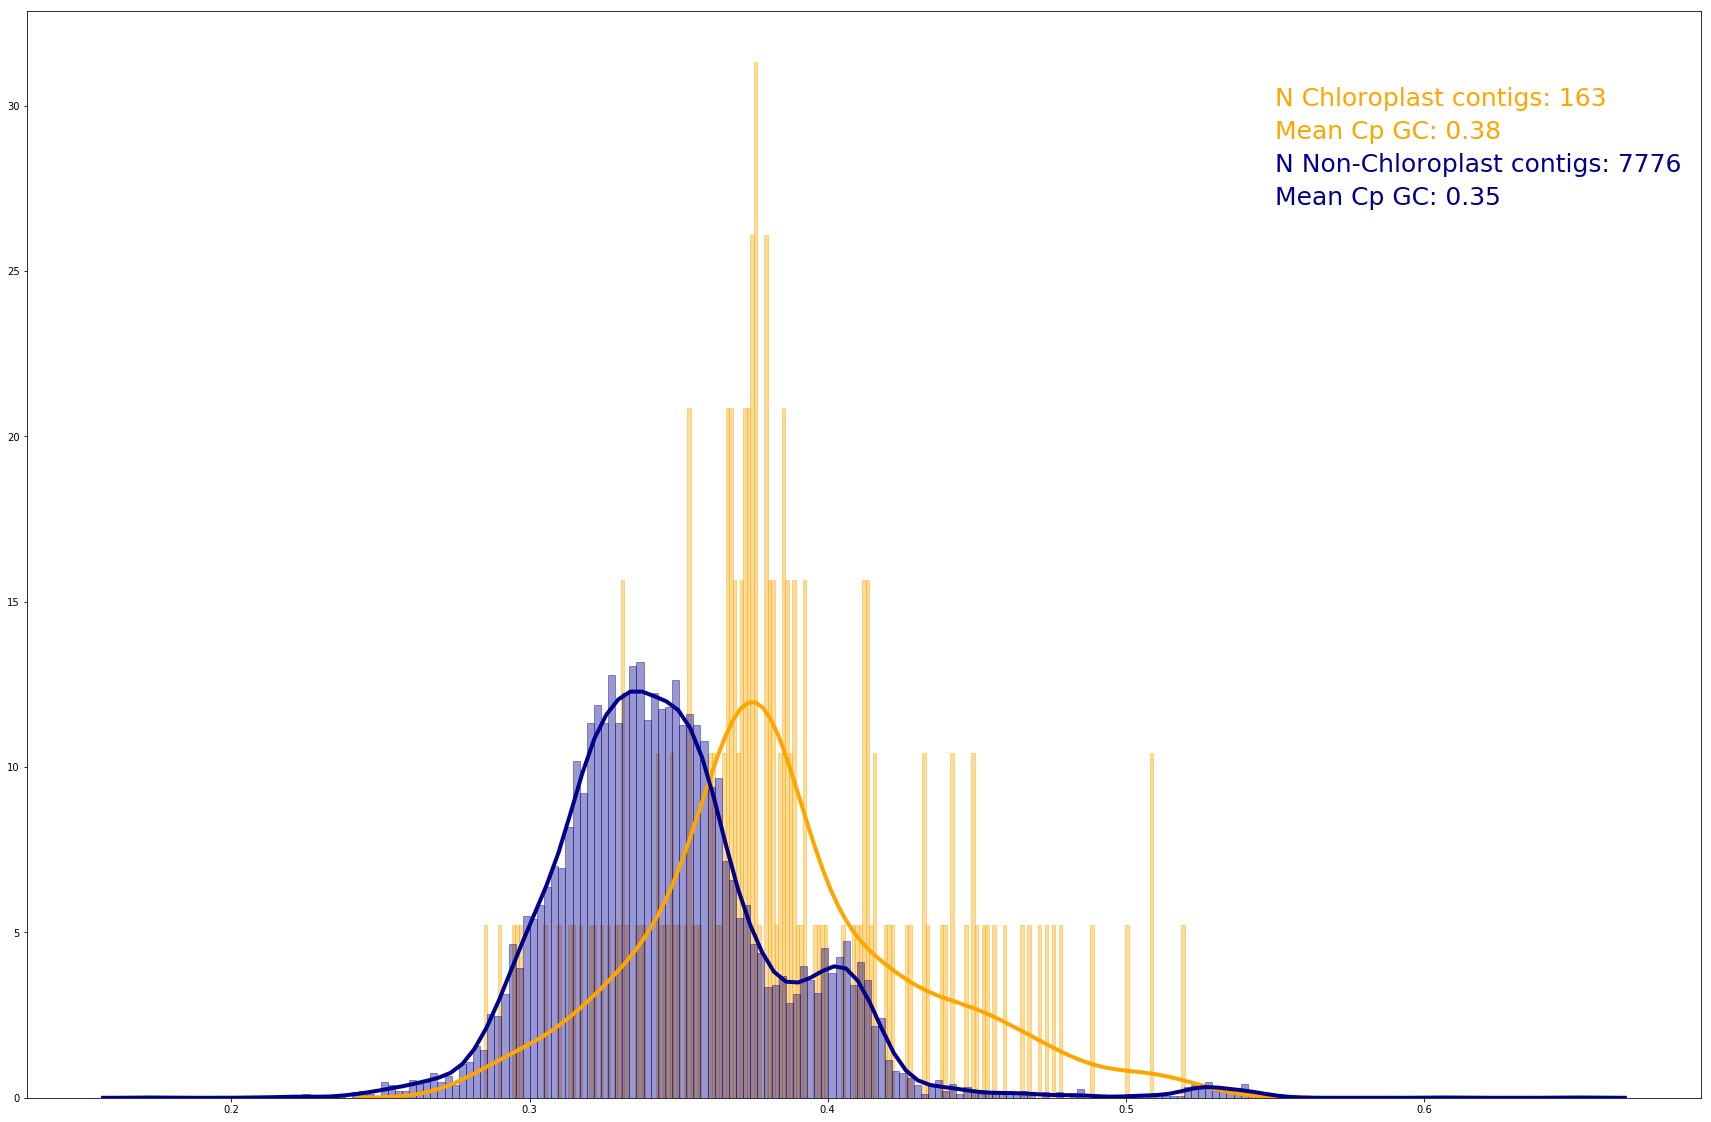

In [123]:
fig = plt.figure(figsize = (30,20))

sns.distplot(Cp_GCs, hist=True, kde=True, bins = 200, color = 'orange', hist_kws={'edgecolor':'orange'},kde_kws={'linewidth': 4})
sns.distplot(Non_Cp_GCs, hist=True, kde=True, bins = 200, color = 'darkblue', hist_kws={'edgecolor':'darkblue'},kde_kws={'linewidth': 4})
plt.text(0.55,30, "N Chloroplast contigs: %s" % len(Cp_GCs), color = "orange", fontsize = 25)
plt.text(0.55,29, "Mean Cp GC: %s" % np.round(np.mean(Cp_GCs),2), color = "orange", fontsize = 25)
plt.text(0.55,28, "N Non-Chloroplast contigs: %s" % len(Non_Cp_GCs), color = "darkblue", fontsize = 25)
plt.text(0.55,27, "Mean Cp GC: %s" % np.round(np.mean(Non_Cp_GCs),2), color = "darkblue", fontsize = 25)
plt.show()


Its not clear whether these reall are chloroplast contigs, or regions of the nucleome that have incorporated chrloroplast genes. Coverage can be informative here, but I had a quick look and it wasn't very useful (see below). We should bear in mind though that we have selected for HMW DNA, so have probably affected the Chloroplast copy number quite a lot. 

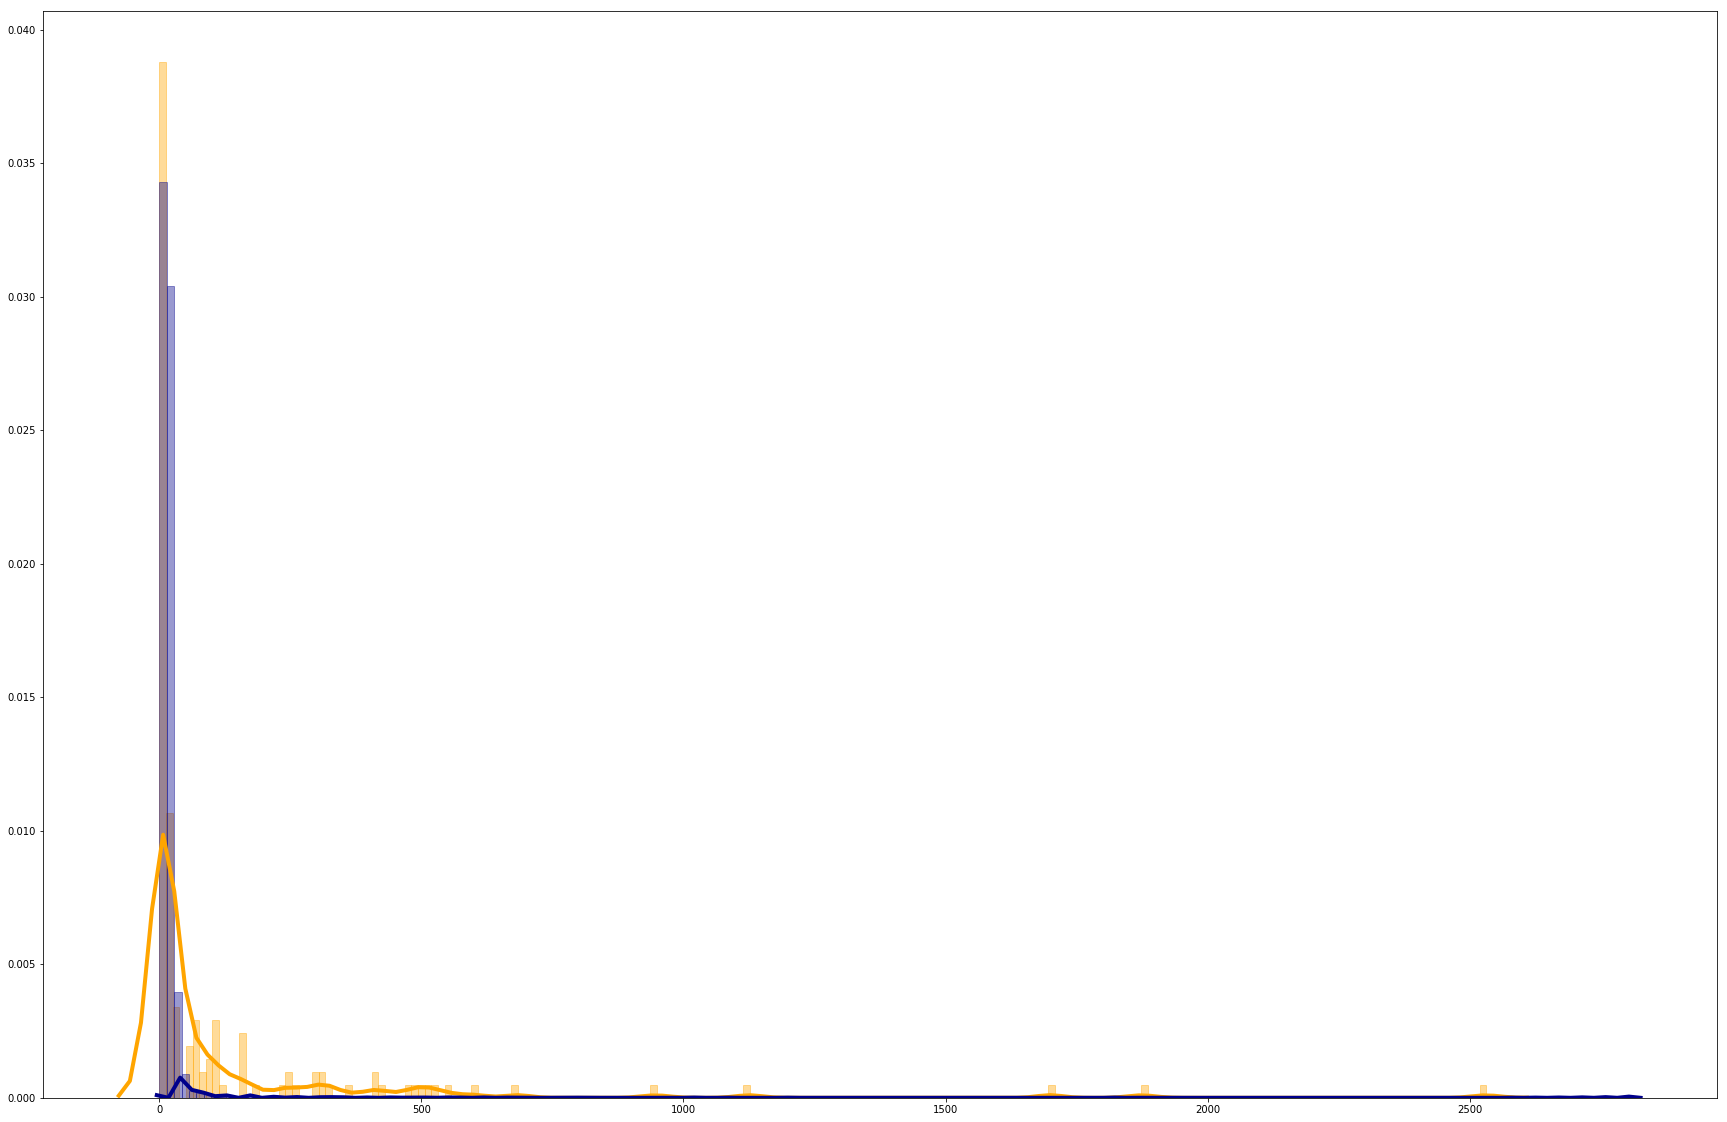

In [189]:
fig = plt.figure(figsize = (30,20))

## Putative chloroplast scaffolds
sns.distplot(Cp_covs, hist=True, kde=True, bins = 200, color = 'orange', hist_kws={'edgecolor':'orange'},kde_kws={'linewidth': 4})

## Non-chloroplast scaffolds
sns.distplot(Non_Cp_covs, hist=True, kde=True, bins = 200, color = 'darkblue', hist_kws={'edgecolor':'darkblue'},kde_kws={'linewidth': 4})


plt.show()


I will also take a couple of random subsets from the non Cp scaffolds to see if this could just be a subsampling effect . . . 

In [142]:
import random

rand_1 = random.sample(Non_Cp_GCs, len(Cp_GCs))
rand_2 = random.sample(Non_Cp_GCs, len(Cp_GCs))
rand_3 = random.sample(Non_Cp_GCs, len(Cp_GCs))


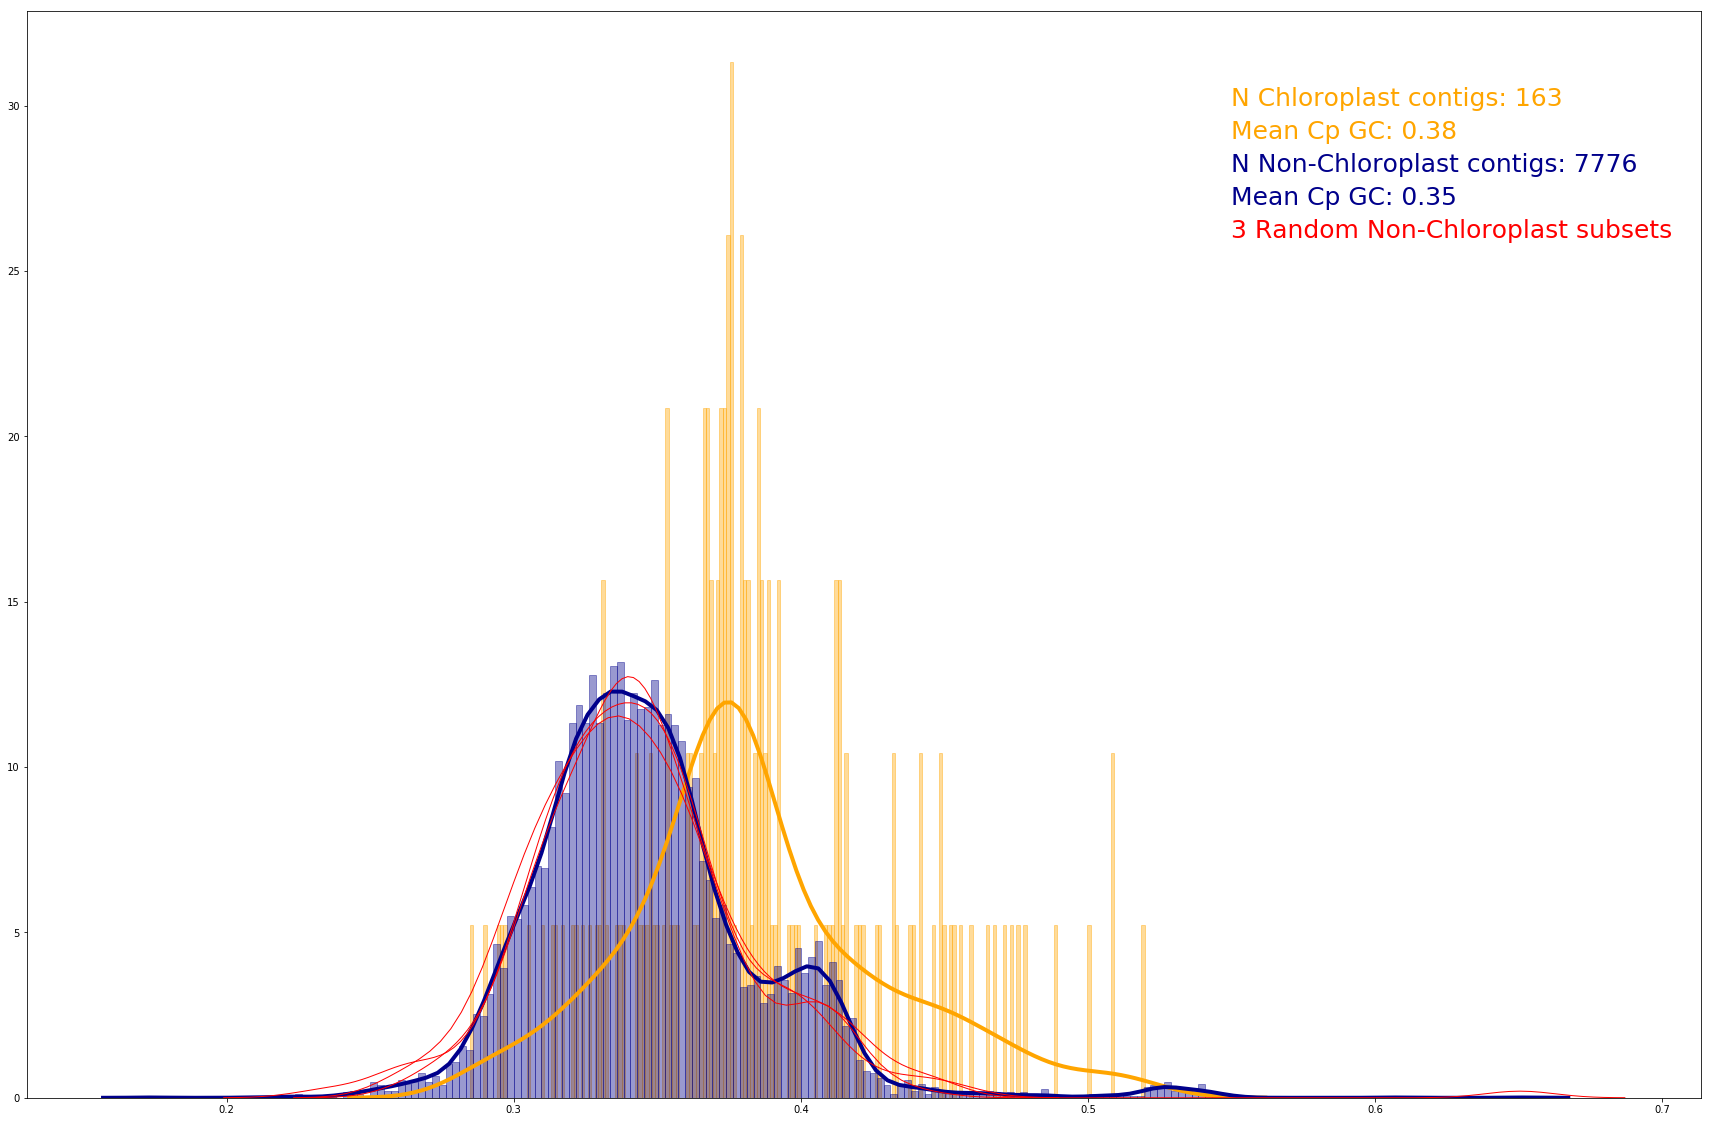

In [154]:
fig = plt.figure(figsize = (30,20))

## Putative chloroplast scaffolds
sns.distplot(Cp_GCs, hist=True, kde=True, bins = 200, color = 'orange', hist_kws={'edgecolor':'orange'},kde_kws={'linewidth': 4})

## Non-chloroplast scaffolds
sns.distplot(Non_Cp_GCs, hist=True, kde=True, bins = 200, color = 'darkblue', hist_kws={'edgecolor':'darkblue'},kde_kws={'linewidth': 4})

## Random subsets
sns.distplot(rand_1, kde=True, hist=False, bins = 200, color = 'red', hist_kws={'edgecolor':'lightblue'},kde_kws={'linewidth': 1})
sns.distplot(rand_2, kde=True, hist=False, bins = 200, color = 'red', hist_kws={'edgecolor':'lightblue'},kde_kws={'linewidth': 1})
sns.distplot(rand_3, kde=True, hist=False, bins = 200, color = 'red', hist_kws={'edgecolor':'lightblue'},kde_kws={'linewidth': 1})

plt.text(0.55,30, "N Chloroplast contigs: %s" % len(Cp_GCs), color = "orange", fontsize = 25)
plt.text(0.55,29, "Mean Cp GC: %s" % np.round(np.mean(Cp_GCs),2), color = "orange", fontsize = 25)
plt.text(0.55,28, "N Non-Chloroplast contigs: %s" % len(Non_Cp_GCs), color = "darkblue", fontsize = 25)
plt.text(0.55,27, "Mean Cp GC: %s" % np.round(np.mean(Non_Cp_GCs),2), color = "darkblue", fontsize = 25)
plt.text(0.55,26, "3 Random Non-Chloroplast subsets", color = "red", fontsize = 25)
plt.show()


So this doesn't really explain these extra Bumps in the data . . . what are these?

Note that the second bump, around GC = 40% have no hits to streptophyta in blobtools. But the 3rd bump, around 53% does! 

So what about the mitochondria?

First, make a hist of the alignment lengths, to see what the distribution looks like

In [164]:
Mt_alignments = []

mito_blast = open("/home/djeffrie/Data/M_huetii_genome/Organelles/Mitochondria/Hevea_brasiliensis_mtGenome_to_polished.out", 'r').readlines()

for line in mito_blast[1:]:
    
    ctg_id = line.split()[1]
    ctg_len = int(line.split()[5])
    aln_len = int(line.split()[4])
    
    scaffold_coverage = aln_len/ctg_len
    
    Mt_alignments.append(aln_len)
    
    if scaffold_coverage > 0.7 or aln_len > 5000:
         
    #    Mt_contigs.append(ctg_id.split("|")[0])
        
#Mt_contigs = set(Mt_contigs)



In [162]:
Mt_alignments = [int(i) for i in Mt_alignments]

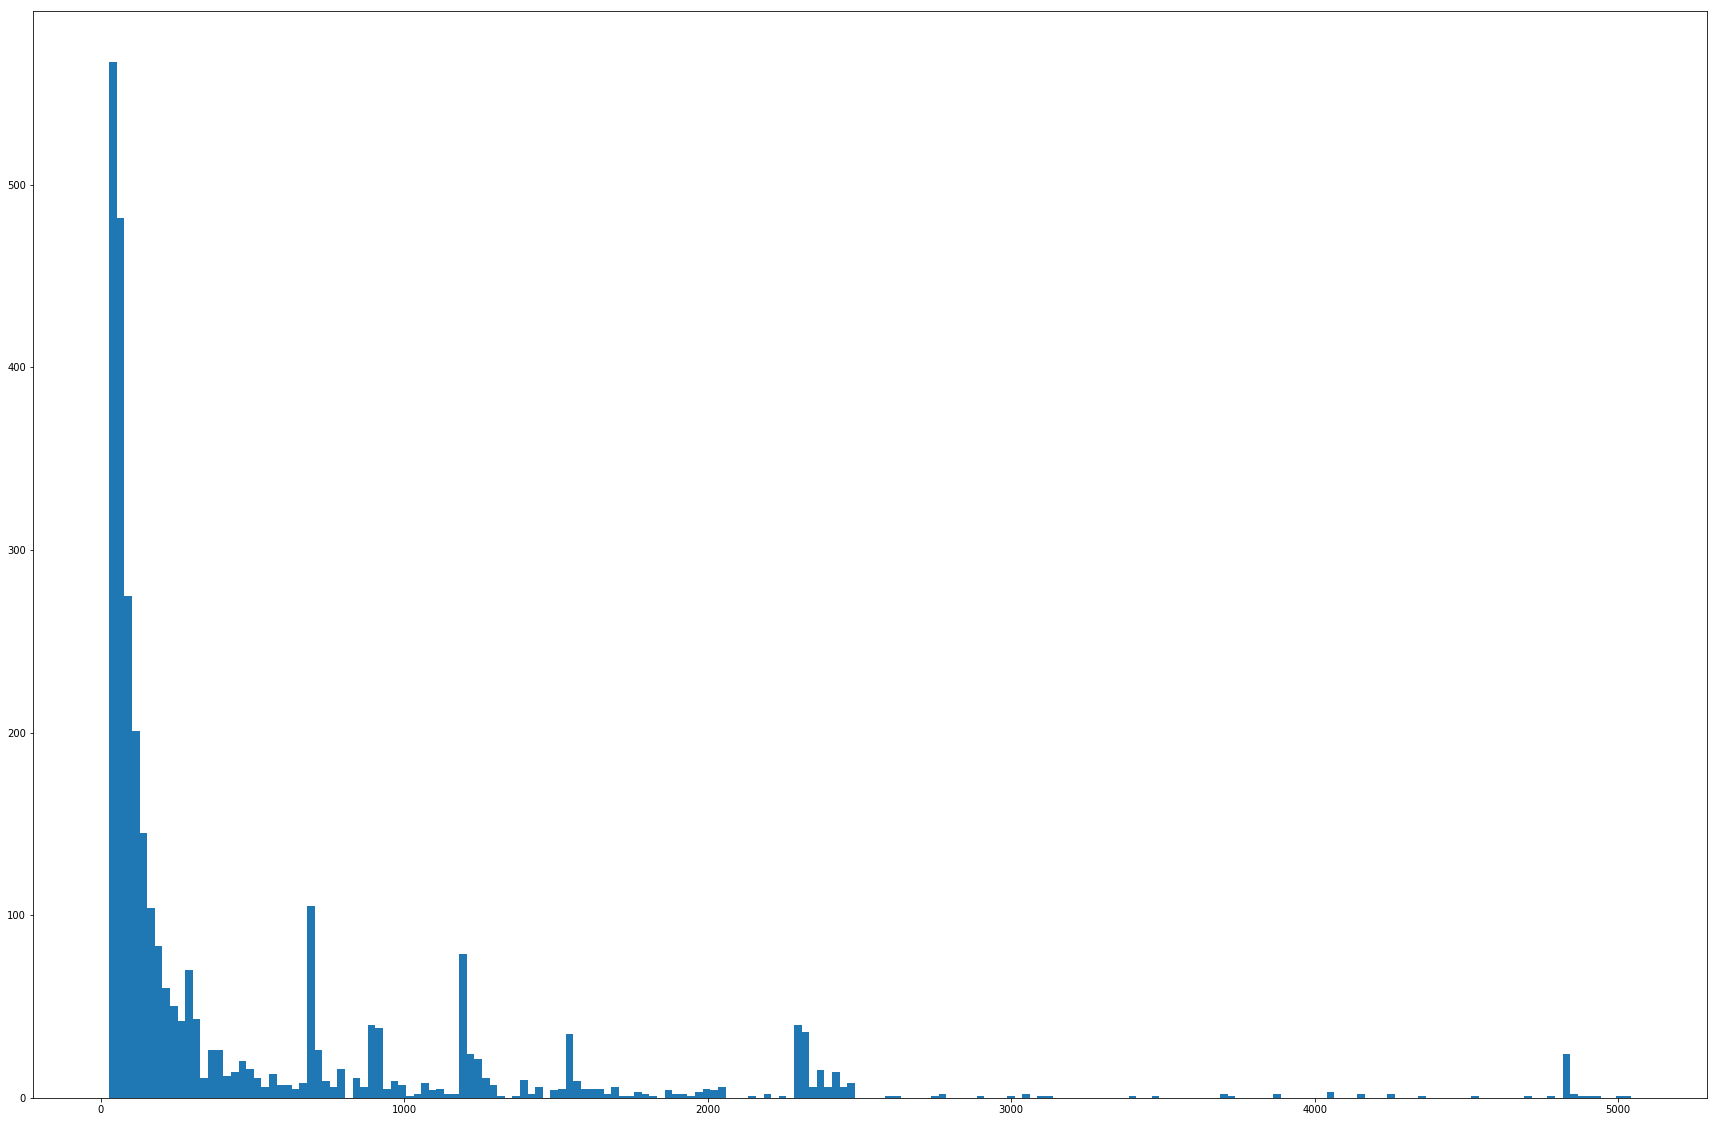

In [165]:
plt.figure(figsize = (30,20))
plt.hist(Mt_alignments, bins = 200)
plt.show()

So lets take the alignment > 4000bp

In [182]:
Mt_contigs = []

mito_blast = open("/home/djeffrie/Data/M_huetii_genome/Organelles/Mitochondria/Hevea_brasiliensis_mtGenome_to_polished.out", 'r').readlines()

for line in mito_blast[1:]:
    
    ctg_id = line.split()[1]
    ctg_len = int(line.split()[5])
    aln_len = int(line.split()[4])
    
    
    scaffold_coverage = aln_len/ctg_len

    if scaffold_coverage > 0.7 or aln_len > 4000:
         
        Mt_contigs.append(ctg_id.split("|")[0])
        
Mt_contigs = set(Mt_contigs)

In [184]:
Mt_GCs = []

blobs = open("/home/djeffrie/Data/M_huetii_genome/Organelles/blobtools.out.blobDB.table.txt", 'r').readlines()

for line in blobs:
    if "#" not in line:
        ctg_id = line.split()[0]
        GC = line.split()[2]
        
        if ctg_id in Mt_contigs:
            Mt_GCs.append(GC)
Mt_GCs = [float(i) for i in Mt_GCs]

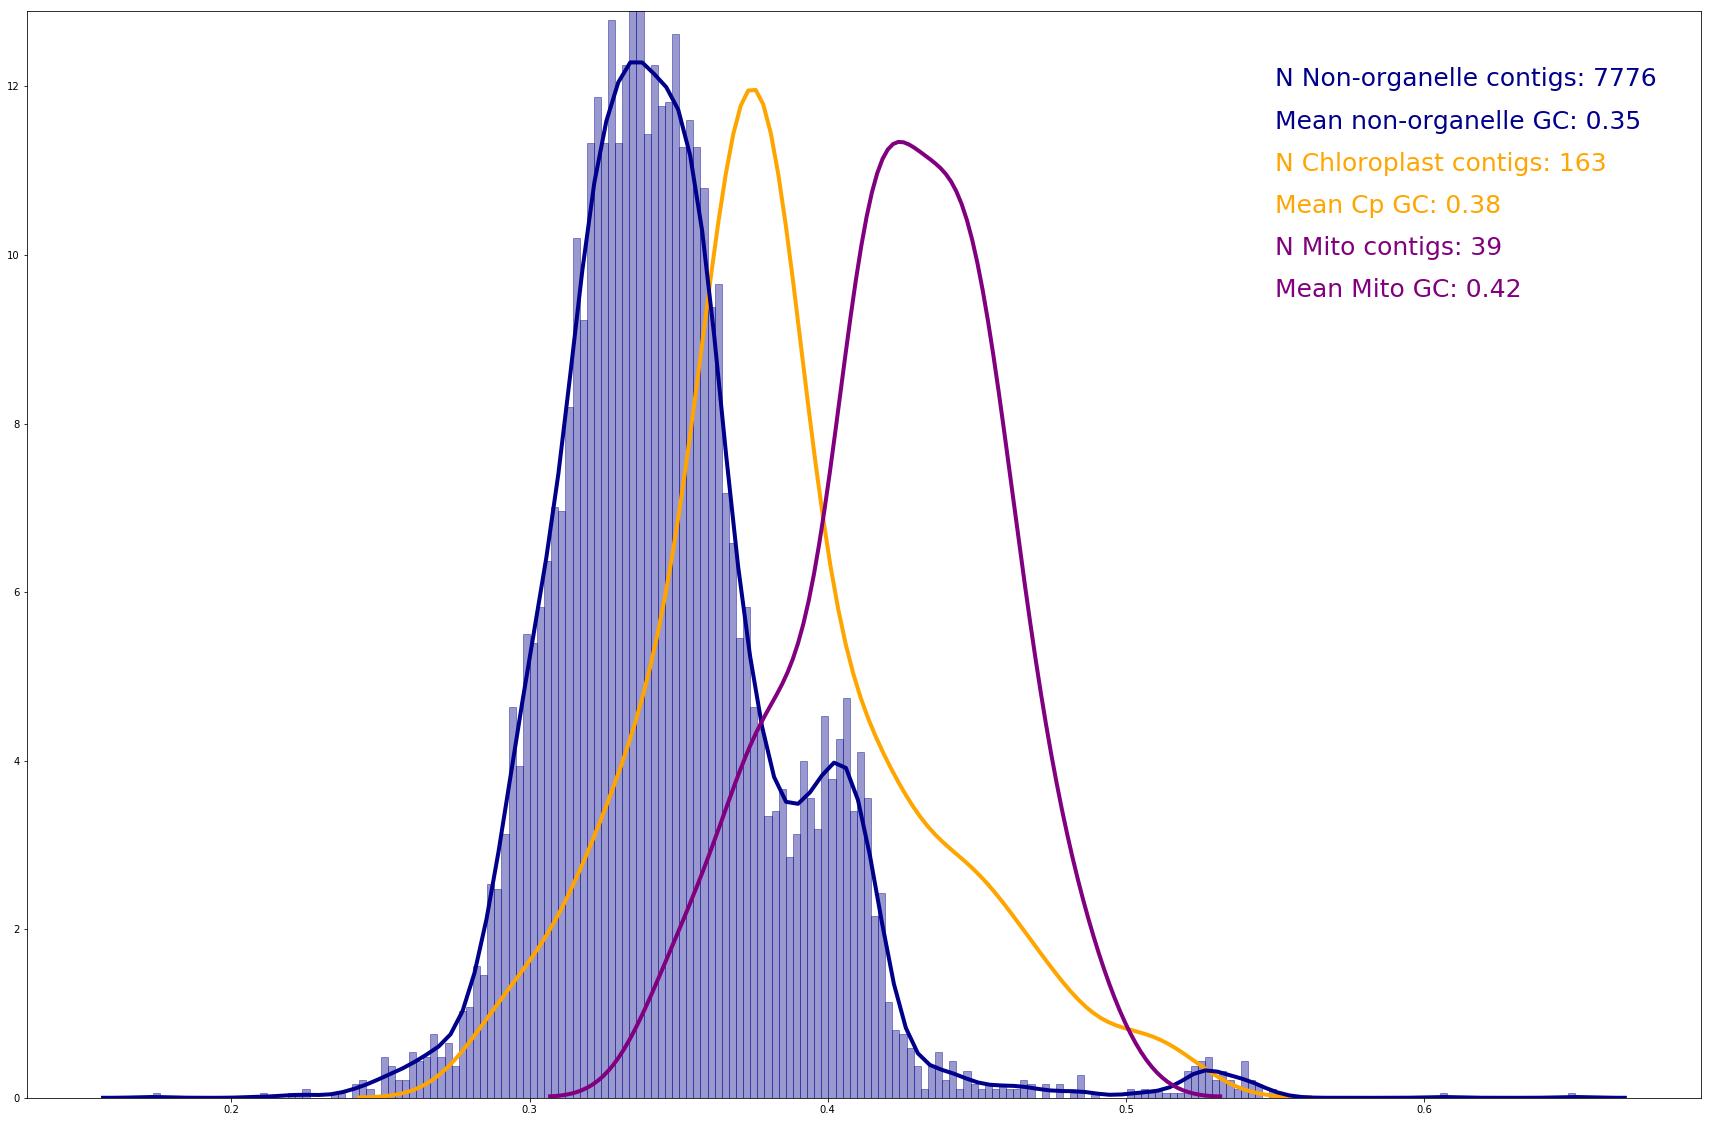

In [286]:
fig = plt.figure(figsize = (30,20))

## Putative chloroplast contigs
sns.distplot(Cp_GCs, hist=False, kde=True, bins = 200, color = 'orange', hist_kws={'edgecolor':'orange'},kde_kws={'linewidth': 4})

## Non-organelle contigs
sns.distplot(Non_Cp_GCs, hist=True, kde=True, bins = 200, color = 'darkblue', hist_kws={'edgecolor':'darkblue'},kde_kws={'linewidth': 4})

## Putative mt contigs
sns.distplot(Mt_GCs, hist=False, kde=True, bins = 200, color = 'purple', hist_kws={'edgecolor':'purple'},kde_kws={'linewidth': 4})


## Random subsets
#
#sns.distplot(rand_1, kde=True, hist=False, bins = 200, color = 'red', hist_kws={'edgecolor':'lightblue'},kde_kws={'linewidth': 1})
#sns.distplot(rand_2, kde=True, hist=False, bins = 200, color = 'red', hist_kws={'edgecolor':'lightblue'},kde_kws={'linewidth': 1})
#sns.distplot(rand_3, kde=True, hist=False, bins = 200, color = 'red', hist_kws={'edgecolor':'lightblue'},kde_kws={'linewidth': 1})

x = 12


plt.text(0.55,x, "N Non-organelle contigs: %s" % len(Non_Cp_GCs), color = "darkblue", fontsize = 25)
plt.text(0.55,x-0.5, "Mean non-organelle GC: %s" % np.round(np.mean(Non_Cp_GCs),2), color = "darkblue", fontsize = 25)

plt.text(0.55,x-1, "N Chloroplast contigs: %s" % len(Cp_GCs), color = "orange", fontsize = 25)
plt.text(0.55,x-1.5, "Mean Cp GC: %s" % np.round(np.mean(Cp_GCs),2), color = "orange", fontsize = 25)

plt.text(0.55,x-2, "N Mito contigs: %s" % len(Mt_GCs), color = "purple", fontsize = 25)
plt.text(0.55,x-2.5, "Mean Mito GC: %s" % np.round(np.mean(Mt_GCs),2), color = "purple", fontsize = 25)
#plt.text(0.55,24, "3 Random Non-organelle subsets", color = "red", fontsize = 25)

plt.savefig("/home/djeffrie/Data/M_huetii_genome/Organelles/GC_density_plot.pdf")

plt.show()


In [191]:
Mt_covs = []

blobs = open("/home/djeffrie/Data/M_huetii_genome/Organelles/blobtools.out.blobDB.table.txt", 'r').readlines()

for line in blobs:
    if "#" not in line:
        ctg_id = line.split()[0]
        GC = line.split()[2]
        cov = line.split()[4]
        
        if ctg_id in Mt_contigs:
            Mt_covs.append(cov)
Mt_covs = [float(i) for i in Mt_covs]

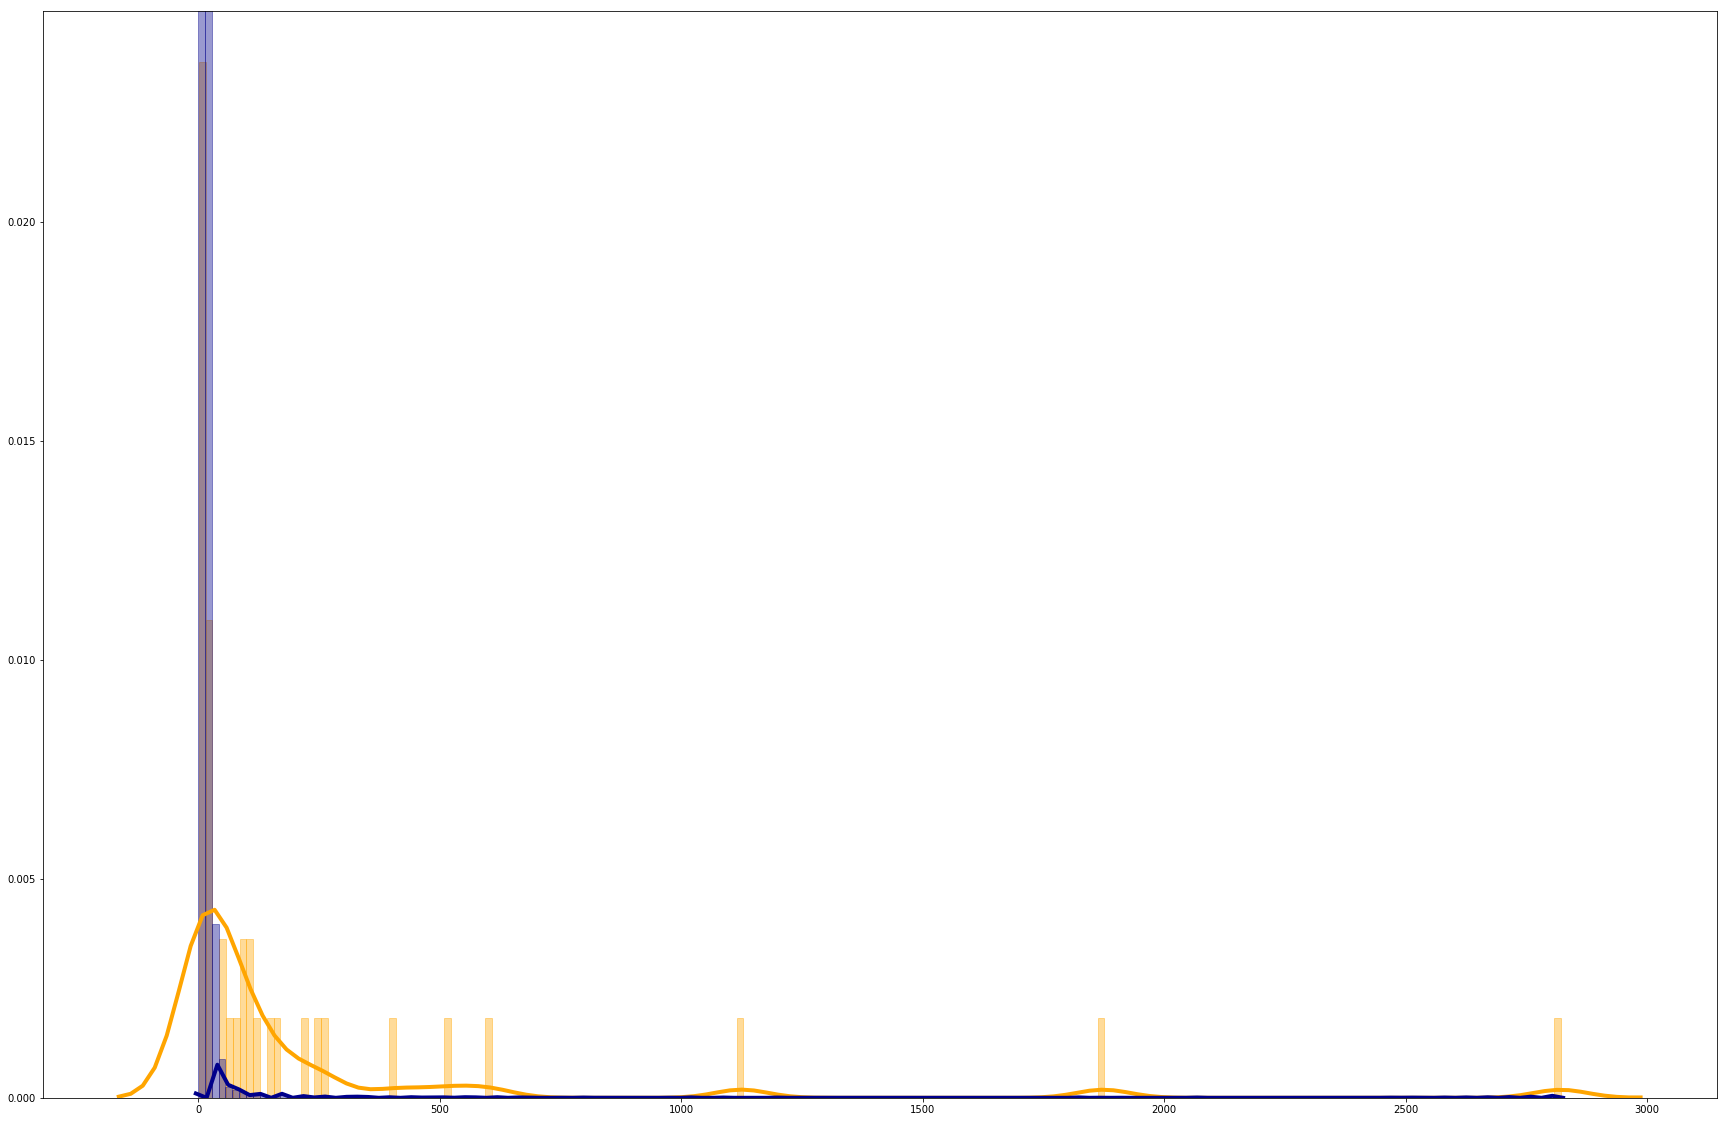

In [194]:
fig = plt.figure(figsize = (30,20))

## Putative chloroplast scaffolds
sns.distplot(Mt_covs, hist=True, kde=True, bins = 200, color = 'orange', hist_kws={'edgecolor':'orange'},kde_kws={'linewidth': 4})

## Non-chloroplast scaffolds
sns.distplot(Non_Cp_covs, hist=True, kde=True, bins = 200, color = 'darkblue', hist_kws={'edgecolor':'darkblue'},kde_kws={'linewidth': 4})

plt.show()

Again, coverage not so useful. 

So, what the hell are these contigs ?

Could their length be useful?

In [230]:
GCs = []
lengths = []

blobs = open("/home/djeffrie/Data/M_huetii_genome/Organelles/blobtools.out.blobDB.table.txt", 'r').readlines()

for line in blobs:
    if "#" not in line:
        ctg_id = line.split()[0]
        GC = line.split()[2]
        length = line.split()[1]
        
        GCs.append(float(GC))
        lengths.append(int(length))
        

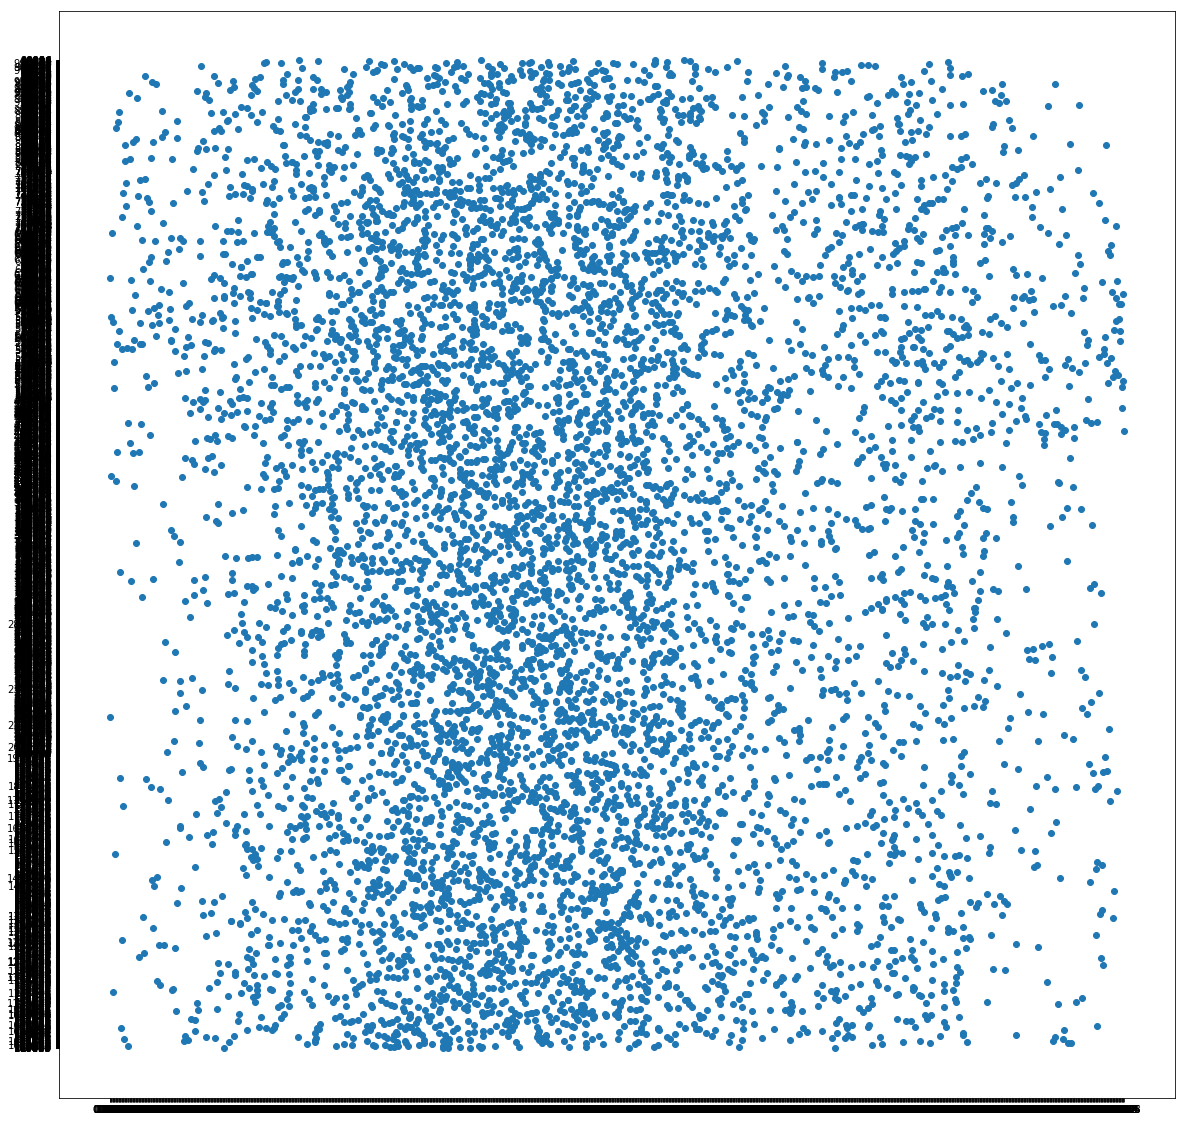

In [221]:
fig = plt.figure(figsize = (20,20))

plt.scatter(GCs, lengths)

plt.show()

Nope

## Next approach:

Find the contigs with these weird GCs and blast them myself against nt. I don't believe they have NO hits at all. 

In [280]:
bump_2 = []
bump_3 = []


for line in blobs:
    
    if "#" not in line:
        ctg_id = line.split()[0]
        GC = float(line.split()[2])

        if 0.39 < GC < 0.42:
            bump_2.append(ctg_id)
                        
        elif 0.51 < GC < 0.55:
            bump_3.append(ctg_id)

Now make fastas with these

In [284]:
from Bio import SeqIO

assembly = SeqIO.parse(open("/home/djeffrie/Data/M_huetii_genome/Assembly/S3_e2_A_p19_cons_arrow.fa", 'r'),"fasta")

bump_2_file = open("/home/djeffrie/Data/M_huetii_genome/Organelles/bump_2.fa", 'w')
bump_3_file = open("/home/djeffrie/Data/M_huetii_genome/Organelles/bump_3.fa", 'w')

for seq in assembly:
    if seq.id.split("|")[0] in bump_2:
        SeqIO.write(seq,bump_2_file, "fasta" )
        
    elif seq.id.split("|")[0] in bump_3:
        SeqIO.write(seq,bump_3_file, "fasta" )
        
bump_2_file.close()
bump_3_file.close()